In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as SklearnLogReg

class LogisticRegression:

    def __init__(self, L=0.001, n_iters=10000):
        self.L = L  # Learning rate 
        self.n_iters = n_iters
        self.m_now = None  # Weights 
        self.b_now = None  # Bias 

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.m_now = np.zeros(n_features)
        self.b_now = 0

        for _ in range(self.n_iters):
            # y = mx + b
            linear_model = np.dot(X, self.m_now) + self.b_now
            y_predcited = self._sigmoid(linear_model)

            # Gradient of cross-entropy loss for weights and bias
            m_gradient = -(1 / n_samples) * np.dot(X.T, (Y - y_predcited)) 
            b_gradient = -(1 / n_samples) * np.sum(Y - y_predcited)

            self.m_now -= self.L * m_gradient
            self.b_now -= self.L * b_gradient

    def predict(self, X):
        # y = mx + b
        linear_model = np.dot(X, self.m_now) + self.b_now
        y_predcited = self._sigmoid(linear_model)
        y_predcited_class = [1 if i >= 0.5 else 0 for i in y_predcited]
        return np.array(y_predcited_class)
    
    def predict_probability(self, X):
        linear_model = np.dot(X, self.m_now) + self.b_now
        y_predcited = self._sigmoid(linear_model)
        return y_predcited

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [30]:
data = load_digits()
X = data.data
y = data.target

# We will convert the problem to binary classification (0 vs not 0)
y = np.where(y == 0, 1, 0)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.72%


Custom Logistic Regression Accuracy: 90.00%
Sklearn Logistic Regression Accuracy: 90.00%

Model Parameters:
Custom model weights: [-0.2530206   3.22872618]
Custom model bias: 0.6306977088256347
Sklearn model weights: [-0.52914131  3.36138003]
Sklearn model bias: 1.240086480434371

Weight Comparison:
Weight 0: Custom = -0.253021, Sklearn = -0.529141, Difference = 0.276121
Weight 1: Custom = 3.228726, Sklearn = 3.361380, Difference = 0.132654

Bias: Custom = 0.630698, Sklearn = 1.240086, Difference = 0.609389


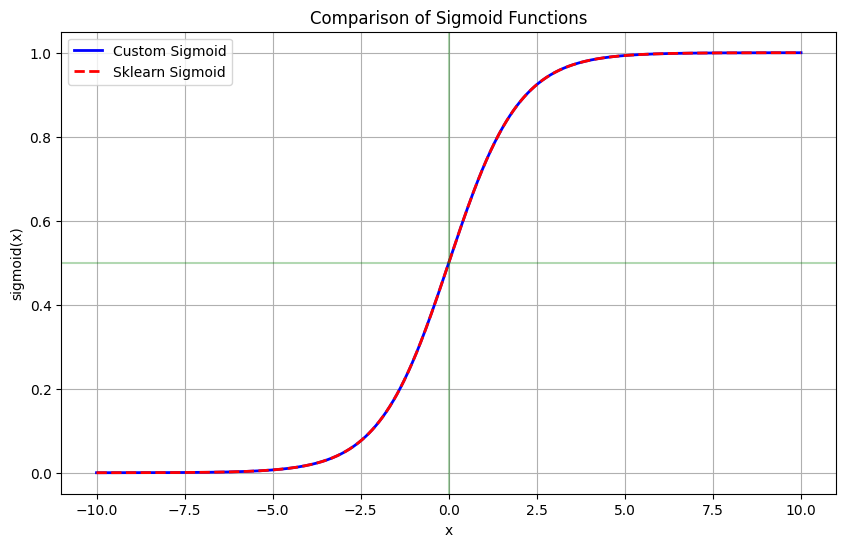

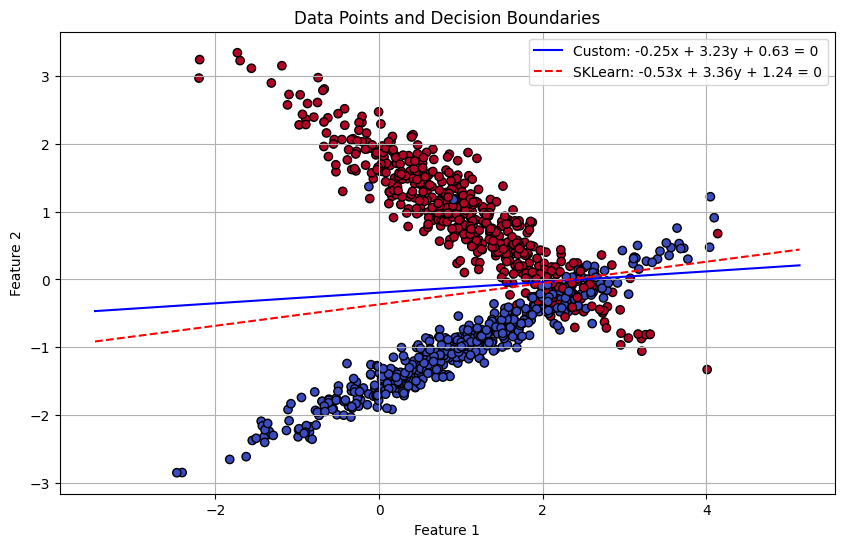

In [33]:
# Generate classification data
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=42, n_clusters_per_class=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train custom model
custom_model = LogisticRegression(L=0.01, n_iters=10000)
custom_model.fit(X_train, y_train)

# Train scikit-learn model
sklearn_model = SklearnLogReg(max_iter=10000)
sklearn_model.fit(X_train, y_train)

# Calculate accuracy for both models
y_pred = custom_model.predict(X_test)
sklearn_y_pred = sklearn_model.predict(X_test)

custom_accuracy = accuracy_score(y_test, y_pred)
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)

print(f"Custom Logistic Regression Accuracy: {custom_accuracy * 100:.2f}%")
print(f"Sklearn Logistic Regression Accuracy: {sklearn_accuracy * 100:.2f}%")

# Display model parameters
print("\nModel Parameters:")
print("Custom model weights:", custom_model.m_now)
print("Custom model bias:", custom_model.b_now)
print("Sklearn model weights:", sklearn_model.coef_[0])
print("Sklearn model bias:", sklearn_model.intercept_[0])

# Compare parameters
print("\nWeight Comparison:")
for i in range(2):
    print(f"Weight {i}: Custom = {custom_model.m_now[i]:.6f}, Sklearn = {sklearn_model.coef_[0][i]:.6f}, Difference = {abs(custom_model.m_now[i] - sklearn_model.coef_[0][i]):.6f}")

print(f"\nBias: Custom = {custom_model.b_now:.6f}, Sklearn = {sklearn_model.intercept_[0]:.6f}, Difference = {abs(custom_model.b_now - sklearn_model.intercept_[0]):.6f}")

# Compare sigmoid functions
def custom_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Scikit-learn uses scipy.special.expit, which is equivalent to the sigmoid function
def sklearn_sigmoid(x):
    from scipy.special import expit
    return expit(x)

# Create a plot comparing both sigmoid functions
plt.figure(figsize=(10, 6))

# Data range for sigmoid plot
x_sigmoid = np.linspace(-10, 10, 1000)
y_custom = custom_sigmoid(x_sigmoid)
y_sklearn = sklearn_sigmoid(x_sigmoid)

plt.plot(x_sigmoid, y_custom, 'b-', label='Custom Sigmoid', linewidth=2)
plt.plot(x_sigmoid, y_sklearn, 'r--', label='Sklearn Sigmoid', linewidth=2)
plt.grid(True)
plt.axhline(y=0.5, color='g', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='g', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Comparison of Sigmoid Functions')
plt.legend()

# Simple plot of data points and decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

# Decision boundary for custom model
x_boundary = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_boundary_custom = -(custom_model.m_now[0] * x_boundary + custom_model.b_now) / custom_model.m_now[1]
plt.plot(x_boundary, y_boundary_custom, 'b-', label=f'Custom: {custom_model.m_now[0]:.2f}x + {custom_model.m_now[1]:.2f}y + {custom_model.b_now:.2f} = 0')

# Decision boundary for scikit-learn model
y_boundary_sklearn = -(sklearn_model.coef_[0][0] * x_boundary + sklearn_model.intercept_[0]) / sklearn_model.coef_[0][1]
plt.plot(x_boundary, y_boundary_sklearn, 'r--', label=f'SKLearn: {sklearn_model.coef_[0][0]:.2f}x + {sklearn_model.coef_[0][1]:.2f}y + {sklearn_model.intercept_[0]:.2f} = 0')

plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Decision Boundaries')
plt.legend()
plt.show()


Custom Logistic Regression Accuracy: 97.42%
Sklearn Logistic Regression Accuracy: 97.43%


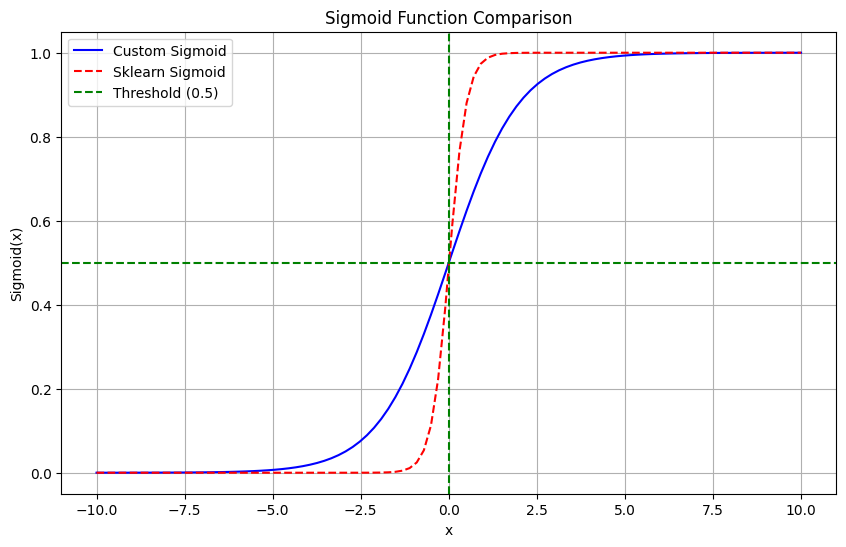

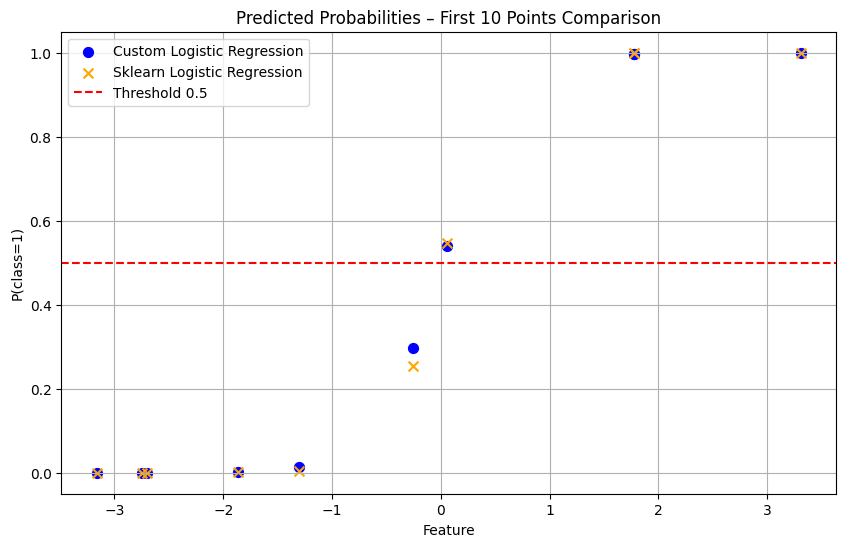

In [36]:
# Generating one-dimensional classification data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.metrics import accuracy_score

np.random.seed(42)
n_samples = 30000

# Generate data from two normal distributions
X_class0 = np.random.normal(-2, 1, (n_samples//2, 1))
X_class1 = np.random.normal(2, 1, (n_samples//2, 1))
X = np.vstack([X_class0, X_class1])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Shuffle the data
indices = np.random.permutation(n_samples)
X, y = X[indices], y[indices]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train custom logistic regression model
custom_model = LogisticRegression(L=0.01, n_iters=10000)
custom_model.fit(X_train, y_train)

# Train scikit-learn logistic regression model
sklearn_model = SklearnLogReg(max_iter=10000)
sklearn_model.fit(X_train, y_train)

# Make predictions
y_pred_custom = custom_model.predict(X_test)
y_pred_sklearn = sklearn_model.predict(X_test)

# Calculate accuracy
custom_accuracy = accuracy_score(y_test, y_pred_custom)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

print(f"Custom Logistic Regression Accuracy: {custom_accuracy * 100:.2f}%")
print(f"Sklearn Logistic Regression Accuracy: {sklearn_accuracy * 100:.2f}%")

#Plot the sigmoid function
x = np.linspace(-10, 10, 100)
y_custom = custom_model._sigmoid(x)
y_sklearn = sklearn_model.predict_proba(x.reshape(-1, 1))[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(x, y_custom, label='Custom Sigmoid', color='blue')
plt.plot(x, y_sklearn, label='Sklearn Sigmoid', color='red', linestyle='--')
plt.title('Sigmoid Function Comparison')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.axhline(0.5, color='green', linestyle='--', label='Threshold (0.5)')
plt.axvline(0, color='green', linestyle='--')
plt.legend()
plt.grid()
plt.show()


# Calculate predicted probabilities for both models
y_proba_custom = custom_model.predict_probability(X_test)
y_proba_sklearn = sklearn_model.predict_proba(X_test)[:, 1]

# Limit to first 10 points
X_sample = X_test[:10].ravel()
y_proba_custom_sample = y_proba_custom[:10]
y_proba_sklearn_sample = y_proba_sklearn[:10]

plt.figure(figsize=(10, 6))

# Plot custom model predictions
plt.scatter(X_sample, y_proba_custom_sample, s=50, color='blue', label='Custom Logistic Regression')

# Plot sklearn model predictions
plt.scatter(X_sample, y_proba_sklearn_sample, s=50, color='orange', marker='x', label='Sklearn Logistic Regression')

# Draw threshold line
plt.axhline(0.5, color='red', linestyle='--', label='Threshold 0.5')

plt.xlabel('Feature')
plt.ylabel('P(class=1)')
plt.title('Predicted Probabilities – First 10 Points Comparison')
plt.legend()
plt.grid()
plt.show()